# Visualizing DC Bicycle Crashes: 2012-2019
Source from [Open Data DC](https://opendata.dc.gov/datasets/crashes-in-dc) - contains hundreds of up to date and local datasets! Maintained by the DC Government.

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Importing the CSV as a Pandas dataframe.

In [2]:
crashes_df = pd.read_csv("Crashes_in_DC.csv")
crashes_df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY,BLOCKKEY,SUBBLOCKKEY
0,-76.961871,38.851937,113416996,27109720,16184327,2016-10-29T18:22:43.000Z,13063502,2896.514,0.0000,6415.0,...,10.779332,East,NaN,NaN,38.851868,-76.961865,NaN,NaN,NaN,NaN
1,-76.983181,38.853100,113416997,25052900,14101663,2014-07-10T05:00:00.000Z,13082352,25.242,0.0000,5493.0,...,26.065704,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-77.032413,38.901990,113416998,25012574,13172581,2013-12-02T05:00:00.000Z,47072652,2.134,0.0000,-9.0,...,-999.000000,NaN,NaN,NaN,38.902167,-77.032409,NaN,NaN,NaN,NaN
3,-76.990864,38.920732,113416999,27109729,16184337,2016-10-29T18:41:24.000Z,12017612,670.255,78.0288,12819.0,...,145.147178,Southwest,NaN,NaN,38.920725,-76.990862,400796.12,139221.00,NaN,NaN
4,-77.032926,38.946477,113417000,27109732,16184334,2016-10-29T18:55:28.000Z,47039402,17.069,0.0000,-9.0,...,20.613891,West,NaN,NaN,38.946572,-77.032923,397140.53,142092.98,NaN,NaN


Subset the crashes_df by columns of interest - Report Date, Address, Ward, and Major Injuries to Bicyclist. In this case, Major Injuries to Bicyclist is a dummy variable with 1 indicating there was an injury.

In [3]:
df = crashes_df[["REPORTDATE", "ADDRESS", "WARD", "MAJORINJURIES_BICYCLIST"]]
df.dropna()
df.head()

,REPORTDATE,ADDRESS,WARD,MAJORINJURIES_BICYCLIST
0,2016-10-29T18:22:43.000Z,2600 SOUTHERN AVE SE,Ward 7,0
1,2014-07-10T05:00:00.000Z,STANTON RD SE and SUITLAND PKWY SE,Ward 8,0
2,2013-12-02T05:00:00.000Z,1400 K STREET NW,Ward 2,0
3,2016-10-29T18:41:24.000Z,901 RHODE ISLAND AVENUE NE,Ward 5,0
4,2016-10-29T18:55:28.000Z,4618 14TH STREET NW,Ward 4,0


Convert REPORTDATE column to datetime and create a separate year column. Note: the conversion to year will have difficulty if there are NaN values in the dataframe. Because of this, I dropna.

In [4]:
df['REPORTDATE'] = pd.to_datetime(df['REPORTDATE'])
df.dropna(inplace=True)
df['year'] = df['REPORTDATE'].dt.year
df.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,REPORTDATE,ADDRESS,WARD,MAJORINJURIES_BICYCLIST,year
0,2016-10-29 18:22:43,2600 SOUTHERN AVE SE,Ward 7,0,2016
1,2014-07-10 05:00:00,STANTON RD SE and SUITLAND PKWY SE,Ward 8,0,2014
2,2013-12-02 05:00:00,1400 K STREET NW,Ward 2,0,2013
3,2016-10-29 18:41:24,901 RHODE ISLAND AVENUE NE,Ward 5,0,2016
4,2016-10-29 18:55:28,4618 14TH STREET NW,Ward 4,0,2016


Below, I specify that I only want to return values where Major Injuries to Bicyclist equal 1, indicating a serious injury.

In [5]:
df2 = df[df.MAJORINJURIES_BICYCLIST == 1]
df2.head()

,REPORTDATE,ADDRESS,WARD,MAJORINJURIES_BICYCLIST,year
1282,2014-04-26 05:00:00,14TH ST NW / QUINCY ST NW,Ward 4,1,2014
1817,2014-06-06 05:00:00,GEORGIA AVE NW / KENYON ST NW,Ward 1,1,2014
1974,2016-10-29 15:43:42,PENNSYLVANIA AVE SE & 3RD STREET SE\r\n,Ward 6,1,2016
2230,2017-12-06 15:02:09,800 BLOCK OF E STREET NW,Ward 6,1,2017
2363,2016-07-03 01:51:48,4201 18TH STREET NE,Ward 5,1,2016


Create another dataframe, grouping by year and summing instances of major injuries.

In [6]:
df3 = df2.groupby(['year'])[['MAJORINJURIES_BICYCLIST']].sum()
df3

,MAJORINJURIES_BICYCLIST
year,
2012,20
2013,19
2014,51
2015,10
2016,51
2017,57
2018,45
2019,47


## First visualization - Time Series for DC

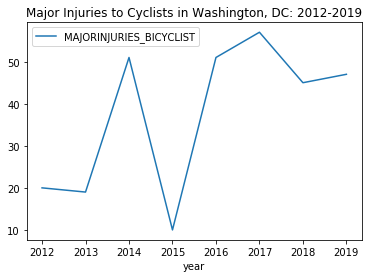

In [7]:
df3.plot.line(title='Major Injuries to Cyclists in Washington, DC: 2012-2019')

## Second visualization - Time Series by Ward in DC

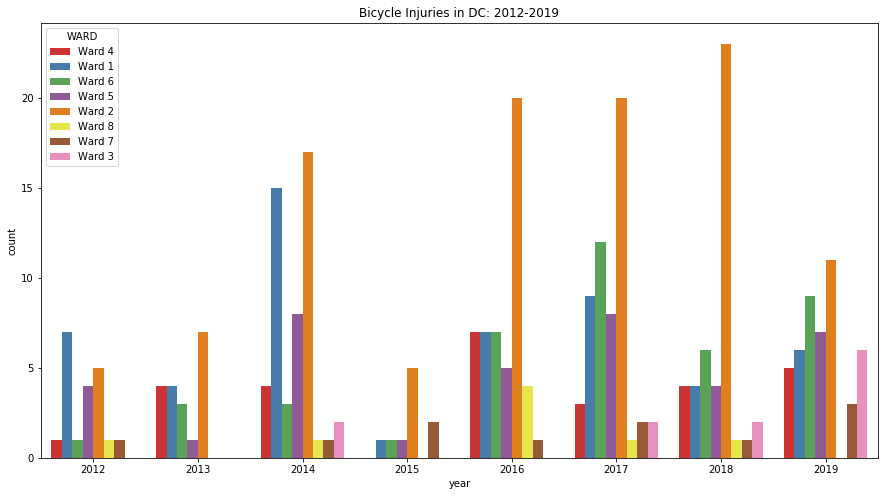

In [8]:
plt.figure(figsize=(15,8))
g = sns.countplot(x="year",hue="WARD", data=df2, palette="Set1").set_title('Bicycle Injuries in DC: 2012-2019')

## Andy Green Response 11/3:

This is super cool! Based on the last graph, it looks like ward 2 leads the other wards in crashes. Just to visualize this more clearly, I've created a new plot that has ward on the x axis, shown below both with and without year added in as a secondary grouping.

Text(0.5, 1.0, 'Bicycle Injuries in DC by Ward: 2012-2019')

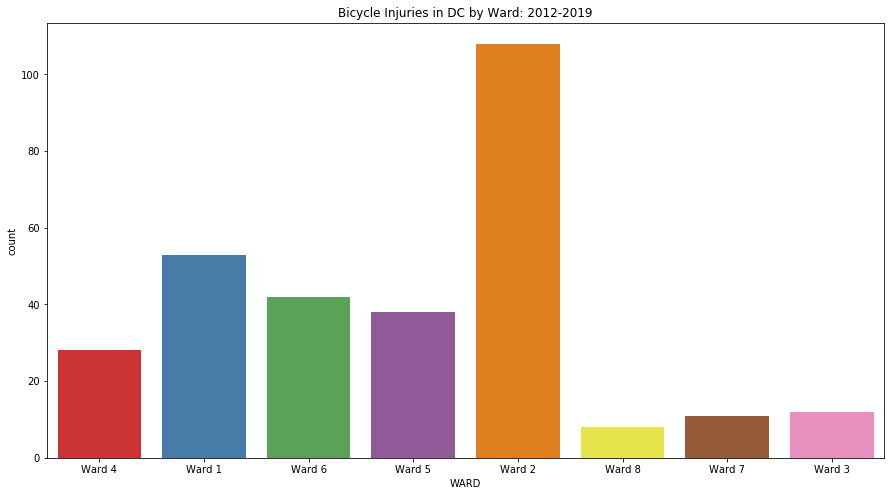

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x="WARD", data=df2, palette="Set1").set_title('Bicycle Injuries in DC by Ward: 2012-2019')

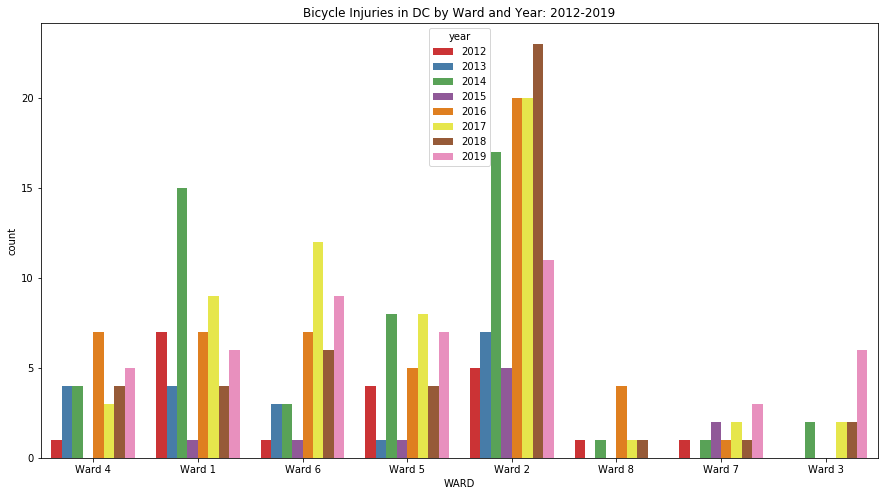

In [10]:
plt.figure(figsize=(15,8))
plot = sns.countplot(x="WARD",hue="year", data=df2, palette="Set1").set_title('Bicycle Injuries in DC by Ward and Year: 2012-2019')